In [3]:
# TODO: exlude year outliers

In [4]:
import pandas as pd

In [5]:
df = pd.read_csv('data/df4.csv')

# Year - Outliers

In [6]:
# What years?
df['year'].min(), df['year'].max()

(np.int64(1485), np.int64(2025))

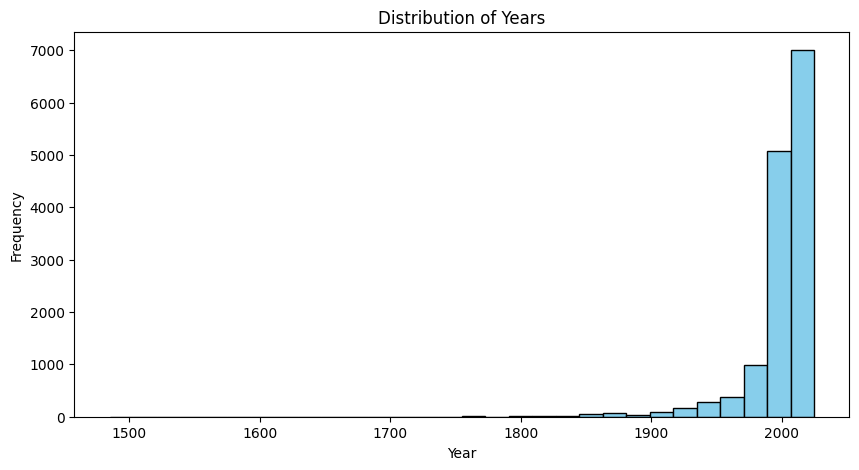

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
df['year'].hist(bins=30, edgecolor='black', color='skyblue')
plt.title("Distribution of Years")
plt.xlabel("Year")
plt.ylabel("Frequency")
plt.grid(False)
plt.show()

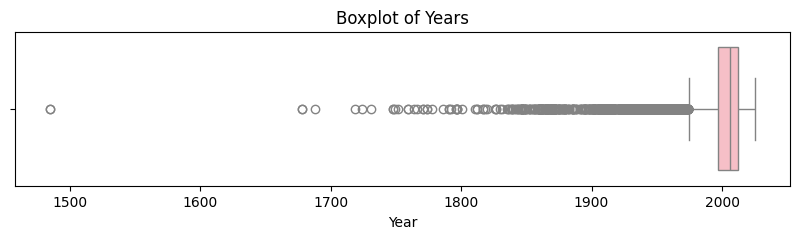

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 2))
sns.boxplot(x=df['year'], color='lightpink')
plt.title("Boxplot of Years")
plt.xlabel("Year")
plt.show()

In [9]:
# Step 1: Compute Q1, Q3, and IQR
Q1 = df['year'].quantile(0.25)
Q3 = df['year'].quantile(0.75)
IQR = Q3 - Q1

# Step 2: Define outlier thresholds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Step 3: Filter the outlier rows
outlier_years = df[(df['year'] < lower_bound) | (df['year'] > upper_bound)]['year'].unique()
print("Outlier years:", sorted(outlier_years))

Outlier years: [np.int64(1485), np.int64(1678), np.int64(1688), np.int64(1719), np.int64(1724), np.int64(1731), np.int64(1748), np.int64(1749), np.int64(1752), np.int64(1759), np.int64(1764), np.int64(1766), np.int64(1771), np.int64(1774), np.int64(1778), np.int64(1786), np.int64(1791), np.int64(1792), np.int64(1796), np.int64(1797), np.int64(1801), np.int64(1811), np.int64(1812), np.int64(1817), np.int64(1818), np.int64(1820), np.int64(1826), np.int64(1827), np.int64(1830), np.int64(1831), np.int64(1835), np.int64(1836), np.int64(1837), np.int64(1838), np.int64(1839), np.int64(1840), np.int64(1841), np.int64(1842), np.int64(1844), np.int64(1845), np.int64(1846), np.int64(1847), np.int64(1848), np.int64(1849), np.int64(1850), np.int64(1852), np.int64(1853), np.int64(1854), np.int64(1855), np.int64(1857), np.int64(1858), np.int64(1859), np.int64(1860), np.int64(1861), np.int64(1862), np.int64(1863), np.int64(1864), np.int64(1865), np.int64(1866), np.int64(1867), np.int64(1868), np.int64

In [10]:
df_outliers = df[df['year'].isin(outlier_years)]
df_outliers

,title,author,fmc_name,year,author_gender,master_genre,Q4.answer,Q4.explanation,Q5.answer,Q5.explanation,...,Q26.explanation,Q27.answer,Q27.explanation,Q28.answer,Q28.explanation,Q29.answer,Q29.explanation,prop_pos,prop_neg,diff_prop
2,Pollyanna Pollyanna 1,"Porter, Eleanor H.",Pollyanna Whittier,1913,1,Children,0.0,There is no instance where Pollyanna is saved ...,1.0,Pollyanna helps Mr. Pendleton by summoning Dr....,...,Pollyanna is not admired for her beauty.,0.0,Pollyanna is not specifically admired for her ...,0.0,Pollyanna does not have a lower rank occupation.,0.0,Pollyanna does not have a higher rank occupation.,0.384615,0.230769,0.153846
5,Homo Faber,"Frisch, Max",Hanna Piper,1957,0,Literary Fiction,0.0,There is no instance where Hanna is saved by a...,0.0,Hanna does not save a male character in the no...,...,There is no mention of Hanna being admired for...,1.0,Hanna is admired for her intelligence and prof...,0.0,Hanna does not have a lower rank occupation.,1.0,Hanna has a higher rank occupation as an archa...,0.307692,0.538462,-0.230769
14,Comet in Moominland The Moomins 2,"Jansson, Tove",Moominmamma,1946,1,Children,0.0,Moominmamma is not shown being saved by a male...,0.0,No instances of Moominmamma saving a male char...,...,Physical appearance is not emphasized in the n...,1.0,Admired for practical wisdom and crisis manage...,0.0,"Homemaking is her primary role, not a subordin...",0.0,Holds no formal high-rank position.,0.416667,0.384615,0.032051
33,The Long Ships New York Review Books Classics,"Bengtsson, Frans G.",Åsa,1941,0,Historical Fiction,NaN,There is no information about Åsa being saved ...,NaN,There is no information about Åsa saving a mal...,...,There is no information about Åsa being admire...,NaN,There is no information about Åsa being admire...,NaN,There is no information about Åsa having a low...,NaN,There is no information about Åsa having a hig...,1.000000,NaN,NaN
35,The Crime of Father Amaro,"Queirós, Eça de",Amélia,1875,0,Literary Fiction,0.0,Amélia is not saved by a male character in the...,0.0,There is no instance where Amélia saves a male...,...,Amélia is admired for her beauty.,0.0,Amélia is not particularly admired for her int...,0.0,Amélia does not have a lower rank occupation.,0.0,Amélia does not have a higher rank occupation.,0.615385,0.000000,0.615385
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14170,The History of Tom Jones a Foundling,"Fielding, Henry",Sophia Western,1749,0,Romance,0.0,Sophia Western is not saved by a male characte...,0.0,There is no instance where Sophia saves a male...,...,Sophia is admired for her beauty.,0.0,"While Sophia is intelligent, she is not specif...",0.0,Sophia does not have a lower rank occupation.,0.0,Sophia does not have a higher rank occupation.,0.461538,0.230769,0.230769
14173,Fifteen,"Cleary, Beverly",Jane Purdy,1956,1,Romance,0.0,There is no instance where Jane is saved by a ...,0.0,Jane does not save a male character in the story.,...,Jane is not particularly admired for her beauty.,0.0,There is no mention of Jane being admired for ...,0.0,Jane does not have a lower rank occupation; sh...,0.0,Jane does not have a higher rank occupation.,0.538462,0.000000,0.538462
14179,Fifth Formers of St Clares,"Blyton, Enid",Felicity Ray,1945,1,Children,0.0,There is no information about Felicity Ray bei...,0.0,There is no information about Felicity Ray sav...,...,There is no information about Felicity Ray bei...,1.0,Felicity Ray is admired for her musical genius.,0.0,There is no information about Felicity Ray hav...,0.0,There is no information about Felicity Ray hav...,0.000000,0.363636,-0.363636
14189,The Painted Veil,"Maugham, W. Somerset",Kitty Fane,1925,0,Romance,0.0,Kitty Fane is not saved by a male character in...,0.0,Kitty does not save a male character in the st...,...,Kitty is admired for her beauty.,0.0,Kitty is not admired for her intelligence in t...,0.0,Kitty does not have a lower rank occupation.,0.0,Kitt

In [11]:
# Remove year outliers 

# Keep only rows where 'year' is NOT an outlier
df_contemp = df[(df['year'] >= lower_bound) & (df['year'] <= upper_bound)].copy()

## only work with df_contemp now, which doesn't include year outliers

In [1]:
import statsmodels.formula.api as smf

In [12]:
# Make categorical variables explicitly categorical 
df_contemp["author_gender"] = df_contemp["author_gender"].astype("category")
df_contemp["master_genre"] = df_contemp["master_genre"].astype("category")

In [15]:
df_contemp.columns

Index(['title', 'author', 'fmc_name', 'year', 'author_gender', 'master_genre',
       'Q4.answer', 'Q4.explanation', 'Q5.answer', 'Q5.explanation',
       'Q6.answer', 'Q6.explanation', 'Q7.answer', 'Q7.explanation',
       'Q8.answer', 'Q8.explanation', 'Q9.answer', 'Q9.explanation',
       'Q10.answer', 'Q10.explanation', 'Q11.answer', 'Q11.explanation',
       'Q12.answer', 'Q12.explanation', 'Q13.answer', 'Q13.explanation',
       'Q14.answer', 'Q14.explanation', 'Q15.answer', 'Q15.explanation',
       'Q16.answer', 'Q16.explanation', 'Q17.answer', 'Q17.explanation',
       'Q18.answer', 'Q18.explanation', 'Q19.answer', 'Q19.explanation',
       'Q20.answer', 'Q20.explanation', 'Q21.answer', 'Q21.explanation',
       'Q22.answer', 'Q22.explanation', 'Q23.answer', 'Q23.explanation',
       'Q24.answer', 'Q24.explanation', 'Q25.answer', 'Q25.explanation',
       'Q26.answer', 'Q26.explanation', 'Q27.answer', 'Q27.explanation',
       'Q28.answer', 'Q28.explanation', 'Q29.answer', 'Q2

# Regressions
## Total (Difference in Proportions)

In [ ]:
# Fit the linear regression model
model_a = smf.ols('diff_prop ~ author_gender', data=df_contemp).fit()

# Print the summary
print(model_a.summary())

# author gender sig

                            OLS Regression Results                            
Dep. Variable:              diff_prop   R-squared:                       0.012
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     157.3
Date:                Mon, 26 May 2025   Prob (F-statistic):           7.23e-36
Time:                        14:57:36   Log-Likelihood:                -5175.2
No. Observations:               12631   AIC:                         1.035e+04
Df Residuals:                   12629   BIC:                         1.037e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept             -0.2375      0

In [17]:
model_a_g = smf.ols('diff_prop ~ author_gender + master_genre', data=df_contemp).fit()

# Print the summary
print(model_a_g.summary())

                            OLS Regression Results                            
Dep. Variable:              diff_prop   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.084
Method:                 Least Squares   F-statistic:                     105.7
Date:                Mon, 26 May 2025   Prob (F-statistic):          8.73e-232
Time:                        14:58:07   Log-Likelihood:                -4696.6
No. Observations:               12631   AIC:                             9417.
Df Residuals:                   12619   BIC:                             9506.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

If we only consider author gender as a predictor, it significantly predicts total sum. 

When we include both author gender and genre as predictors, 
- author gender remains significant. This suggests that, across all genres, there is a significant difference in total sum between the two gender groups. 
- we can examine the individual genre coefficients. These coefficients indicate how the total sum differs for each genre relative to the reference genre (children's books), while holding author gender constant. **However, to determine whether genre has a significant overall effect, a comparison between the full model and a reduced model (e.g., via an F-test) would be needed.**

In [18]:
# F-test to see if genre has an overall significant effect
from statsmodels.stats.anova import anova_lm

f_test = anova_lm(model_a, model_a_g)
print(f_test)

   df_resid          ssr  df_diff     ss_diff          F         Pr(>F)
0   12629.0  1678.210186      0.0         NaN        NaN            NaN
1   12619.0  1555.709420     10.0  122.500765  99.365417  3.817875e-199


Difference is significant -> including genre significantly improves model fit beyond author gender alone, F(10, 12944) = 100.01, p < .001.

This suggests that genre also has a significant main effect on total_sum.

**Together, this suggests that both author characteristics and genre conventions shape the portrayal of female characters.**

I also want to see whether there is an interaction between author gender and genre, meaning that the effect of author gender on total sum may differ depending on the genre, or vice versa. 
For this, I will include an interaction term. Again, to see if the interaction term is overall significant, I'll run an F-test to compare it with the sparser model. 

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_22244/3039861629.py:12: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_avg, x='author_gender', y='diff_prop', palette='pastel')


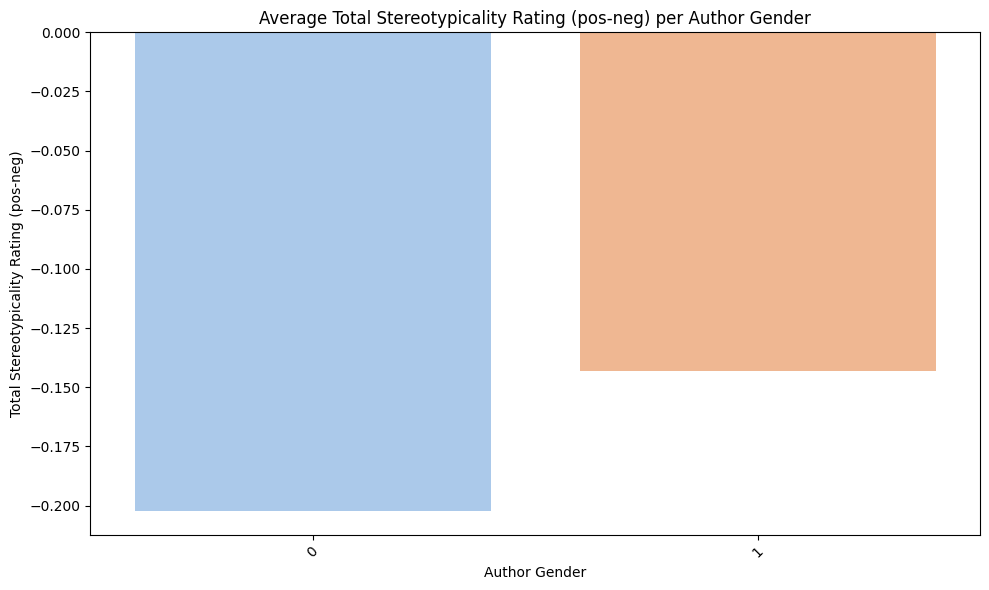

In [ ]:
# Author gender - Total - plot

# Group by genre and calculate mean rating
gender_avg = df.groupby('author_gender')['diff_prop'].mean().reset_index()

# Sort if you want (optional but cute!)
gender_avg = gender_avg.sort_values(by='diff_prop', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=gender_avg, x='author_gender', y='diff_prop', palette='pastel')

plt.title("Average Total Stereotypicality Rating (pos-neg) per Author Gender")
plt.xticks(rotation=45)
plt.ylabel("Total Stereotypicality Rating (pos-neg)")
plt.xlabel("Author Gender")
plt.tight_layout()
plt.show()

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_22244/2288076612.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_avg, x='master_genre', y='diff_prop', palette='pastel')


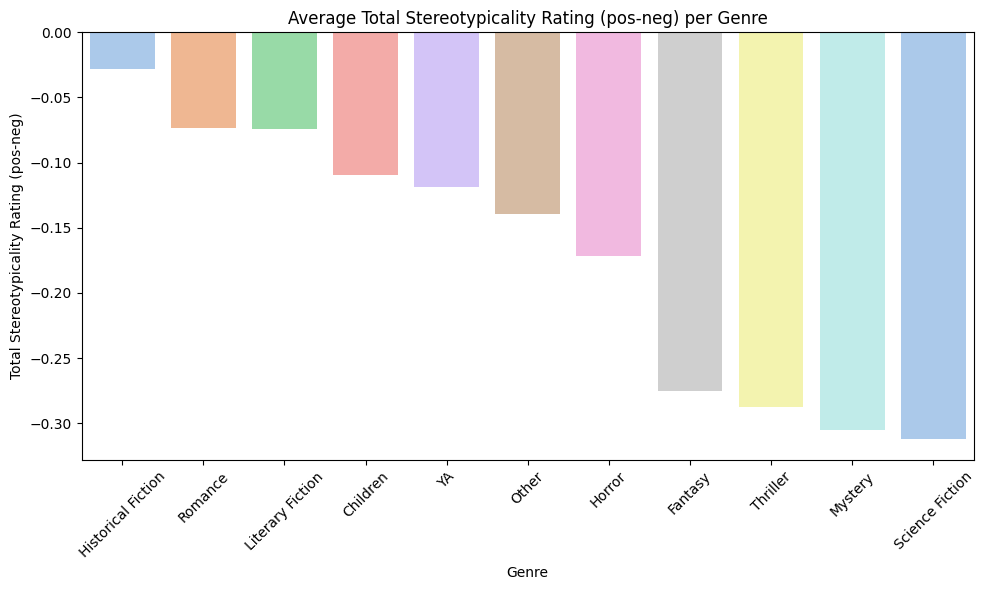

In [46]:
# Genre - Total - plot

# Group by genre and calculate mean rating
genre_avg = df.groupby('master_genre')['diff_prop'].mean().reset_index()

# Sort if you want (optional but cute!)
genre_avg = genre_avg.sort_values(by='diff_prop', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=genre_avg, x='master_genre', y='diff_prop', palette='pastel')

plt.title("Average Total Stereotypicality Rating (pos-neg) per Genre")
plt.xticks(rotation=45)
plt.ylabel("Total Stereotypicality Rating (pos-neg)")
plt.xlabel("Genre")
plt.tight_layout()
plt.show()

In [47]:
# Genre - total - significance test 

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Drop NA values to avoid errors
df_clean = df[['master_genre', 'diff_prop']].dropna()

# Perform Tukey HSD
tukey = pairwise_tukeyhsd(endog=df_clean['diff_prop'],
                          groups=df_clean['master_genre'],
                          alpha=0.05)

print(tukey.summary())

            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1             group2       meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------
          Children            Fantasy  -0.1659    0.0  -0.235 -0.0968   True
          Children Historical Fiction   0.0812 0.0114  0.0098  0.1525   True
          Children             Horror  -0.0623  0.465 -0.1513  0.0266  False
          Children   Literary Fiction   0.0352 0.8875 -0.0361  0.1066  False
          Children            Mystery  -0.1956    0.0 -0.2675 -0.1237   True
          Children              Other  -0.0297 0.9661 -0.1024  0.0429  False
          Children            Romance   0.0363 0.8246 -0.0315  0.1041  False
          Children    Science Fiction  -0.2027    0.0 -0.2801 -0.1253   True
          Children           Thriller  -0.1776    0.0 -0.2521  -0.103   True
          Children                 YA  -0.0087    1.0 -0.0823  0.0649  False

In [19]:
# Fit linear regression with interaction term 
model_a_g_i = smf.ols('diff_prop ~ author_gender + master_genre + author_gender * master_genre', data=df_contemp).fit()

# Print the summary
print(model_a_g_i.summary())

                            OLS Regression Results                            
Dep. Variable:              diff_prop   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     59.08
Date:                Mon, 26 May 2025   Prob (F-statistic):          1.31e-237
Time:                        14:59:45   Log-Likelihood:                -4660.7
No. Observations:               12631   AIC:                             9365.
Df Residuals:                   12609   BIC:                             9529.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

Now, author gender (and genre, but that's already hard to interpret anyway), are not the overall main effects, but specific conditional effects:

- author gender: the coefficient now represents the effect **only within the reference genre**  
- Same for genre: it now means the genre’s effect **only for the baseline gender**.

In [21]:
model_me = smf.ols('diff_prop ~ C(author_gender) * C(master_genre)', data=df_contemp).fit()
anova_model_me = anova_lm(model_me, typ=3)
print(anova_model_me)

                                       sum_sq       df          F  \
Intercept                            2.209028      1.0  18.006177   
C(author_gender)                     0.271952      1.0   2.216727   
C(master_genre)                     45.623945     10.0  37.188878   
C(author_gender):C(master_genre)     8.815969     10.0   7.186051   
Residual                          1546.893451  12609.0        NaN   

                                        PR(>F)  
Intercept                         2.217632e-05  
C(author_gender)                  1.365472e-01  
C(master_genre)                   1.175597e-72  
C(author_gender):C(master_genre)  2.099367e-11  
Residual                                   NaN  


Author gender (p = 0.2007) does not have a main effect, when marginalized over genres.
Genre has a significant main effect, when averaged over genders.
There is a significant interaction, meaning the effect of gender depends on the genre.

In [22]:
# F-test to see if gender-genre-interaction is overall significant
f_test_i = anova_lm(model_a_g, model_a_g_i)
print(f_test_i)

   df_resid          ssr  df_diff   ss_diff         F        Pr(>F)
0   12619.0  1555.709420      0.0       NaN       NaN           NaN
1   12609.0  1546.893451     10.0  8.815969  7.186051  2.099367e-11


Difference is significant -> including interaction between author gender and genre significantly improves model fit beyond author gender and genre alone.

**Together, this suggests that the relationship between author gender and the outcome variable (total_sum) differs by genre — in other words, the effect of gender is not consistent across genres. This highlights the importance of modeling the interaction to capture how genre moderates the influence of author gender.**

In [65]:
# Interaction - Total - gender per genre plot

# Step 1: Create the grid of combinations
predict_df_total = pd.DataFrame(
    [(g, m) for g in df_contemp['author_gender'].unique()
            for m in df_contemp['master_genre'].unique()],
    columns=['author_gender', 'master_genre']
)

# Step 2: Match the dtypes to the training data
predict_df_total['author_gender'] = predict_df_total['author_gender'].astype(df_contemp['author_gender'].dtype)
predict_df_total['master_genre'] = predict_df_total['master_genre'].astype(df_contemp['master_genre'].dtype)

# Step 3: Make predictions
predict_df_total['diff_prop'] = model_a_g_i.predict(predict_df_total)

print(predict_df_total)

   author_gender        master_genre  diff_prop
0              1  Historical Fiction  -0.037362
1              1    Literary Fiction  -0.075624
2              1             Mystery  -0.341817
3              1                  YA  -0.114702
4              1            Children  -0.135172
5              1               Other  -0.115083
6              1             Romance  -0.077388
7              1     Science Fiction  -0.240048
8              1             Fantasy  -0.256469
9              1            Thriller  -0.263927
10             1              Horror  -0.197594
11             0  Historical Fiction  -0.075683
12             0    Literary Fiction  -0.093600
13             0             Mystery  -0.271568
14             0                  YA  -0.132382
15             0            Children  -0.224065
16             0               Other  -0.206967
17             0             Romance  -0.059058
18             0     Science Fiction  -0.432630
19             0             Fantasy  -0

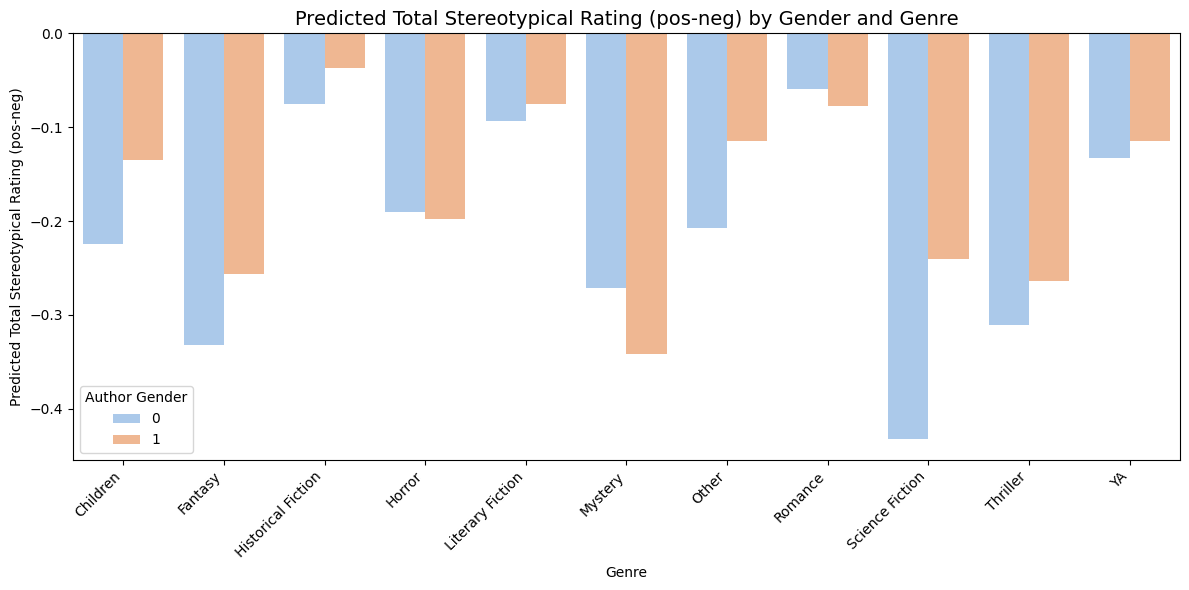

In [66]:
plt.figure(figsize=(12, 6))
sns.barplot(data=predict_df_total, 
            x='master_genre', 
            y='diff_prop', 
            hue='author_gender', 
            palette='pastel')

plt.xticks(rotation=45, ha='right')
plt.title("Predicted Total Stereotypical Rating (pos-neg) by Gender and Genre", fontsize=14)
plt.ylabel("Predicted Total Stereotypical Rating (pos-neg)")
plt.xlabel("Genre")
plt.legend(title="Author Gender")
plt.tight_layout()
plt.show()

## Stereotypical Items

In [23]:
# Fit the linear regression model
model_a_pos = smf.ols('prop_pos ~ author_gender', data=df_contemp).fit()

# Print the summary
print(model_a_pos.summary())

                            OLS Regression Results                            
Dep. Variable:               prop_pos   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.009
Method:                 Least Squares   F-statistic:                     110.2
Date:                Mon, 26 May 2025   Prob (F-statistic):           1.11e-25
Time:                        15:02:19   Log-Likelihood:                 2333.3
No. Observations:               12728   AIC:                            -4663.
Df Residuals:                   12726   BIC:                            -4648.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.3133      0

Women write significantly more stereotypical than men. 

In [24]:
model_a_g_pos = smf.ols('prop_pos ~ author_gender + master_genre', data=df_contemp).fit()

# Print the summary
print(model_a_g_pos.summary())

                            OLS Regression Results                            
Dep. Variable:               prop_pos   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     54.60
Date:                Mon, 26 May 2025   Prob (F-statistic):          8.23e-119
Time:                        15:03:15   Log-Likelihood:                 2572.1
No. Observations:               12728   AIC:                            -5120.
Df Residuals:                   12716   BIC:                            -5031.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

In [25]:
# F-test to see if genre has an overall significant effect
f_test_pos = anova_lm(model_a_pos, model_a_g_pos)
print(f_test_pos)

   df_resid         ssr  df_diff    ss_diff          F        Pr(>F)
0   12726.0  516.482810      0.0        NaN        NaN           NaN
1   12716.0  497.460631     10.0  19.022179  48.624155  3.079160e-96


Both author gender and genre significant. 

In [26]:
# Fit linear regression with interaction term 
model_a_g_i_pos = smf.ols('prop_pos ~ author_gender + master_genre + author_gender * master_genre', data=df_contemp).fit()

# Print the summary
print(model_a_g_i_pos.summary())

                            OLS Regression Results                            
Dep. Variable:               prop_pos   R-squared:                       0.051
Model:                            OLS   Adj. R-squared:                  0.050
Method:                 Least Squares   F-statistic:                     32.72
Date:                Mon, 26 May 2025   Prob (F-statistic):          3.32e-128
Time:                        15:04:13   Log-Likelihood:                 2613.6
No. Observations:               12728   AIC:                            -5183.
Df Residuals:                   12706   BIC:                            -5019.
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [27]:
model_me_pos = smf.ols('prop_pos ~ C(author_gender) * C(master_genre)', data=df_contemp).fit()

anova_model_me_pos = anova_lm(model_me_pos, typ=3)
print(anova_model_me_pos)

                                      sum_sq       df          F        PR(>F)
Intercept                           1.764541      1.0  45.364117  1.706495e-11
C(author_gender)                    0.069477      1.0   1.786175  1.814168e-01
C(master_genre)                     4.309244     10.0  11.078524  4.556968e-19
C(author_gender):C(master_genre)    3.231831     10.0   8.308630  1.389047e-13
Residual                          494.228800  12706.0        NaN           NaN


When including interaction term: 
* author gender main effect ns
* genre main effect sig
* interaction sig


### Predictions per Group

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_22244/1232747958.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_avg, x='author_gender', y='prop_pos', palette='pastel')


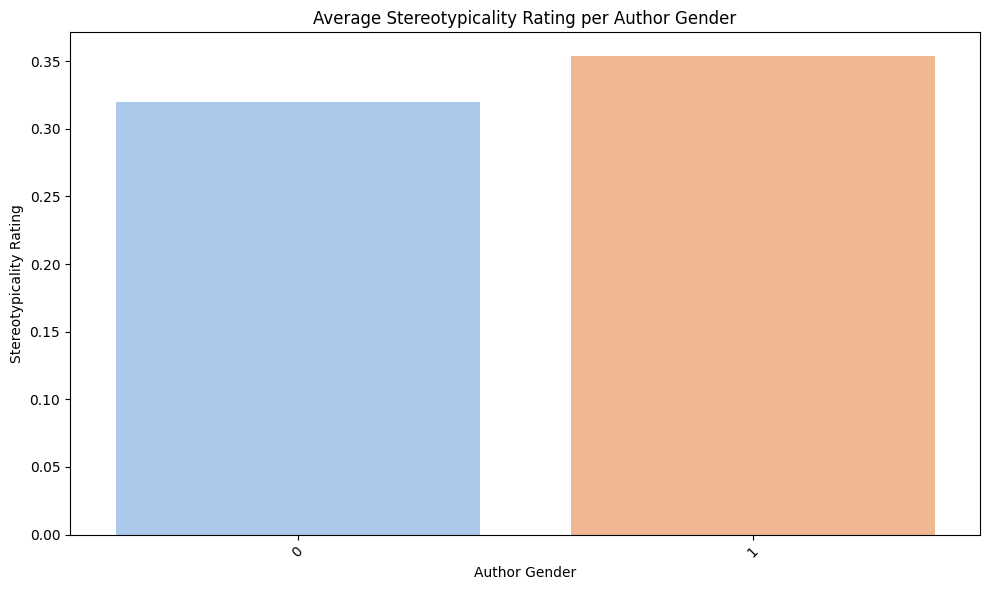

In [ ]:
# Gender only - prop_pos - plot

# Group by genre and calculate mean rating
gender_avg = df.groupby('author_gender')['prop_pos'].mean().reset_index()

# Sort if you want (optional but cute!)
gender_avg = gender_avg.sort_values(by='prop_pos', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=gender_avg, x='author_gender', y='prop_pos', palette='pastel')

plt.title("Average Stereotypicality Rating per Author Gender")
plt.xticks(rotation=45)
plt.ylabel("Stereotypicality Rating")
plt.xlabel("Author Gender")
plt.tight_layout()
plt.show()

In [ ]:
# Gender only - prop_pos - significance test

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Drop NA values to avoid errors
df_clean = df[['author_gender', 'prop_pos']].dropna()

# Perform Tukey HSD
tukey = pairwise_tukeyhsd(endog=df_clean['prop_pos'],
                          groups=df_clean['author_gender'],
                          alpha=0.05)

print(tukey.summary())

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
     0      1    0.034   0.0 0.0268 0.0413   True
-------------------------------------------------


/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_22244/2704155514.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_avg, x='master_genre', y='prop_pos', palette='pastel')


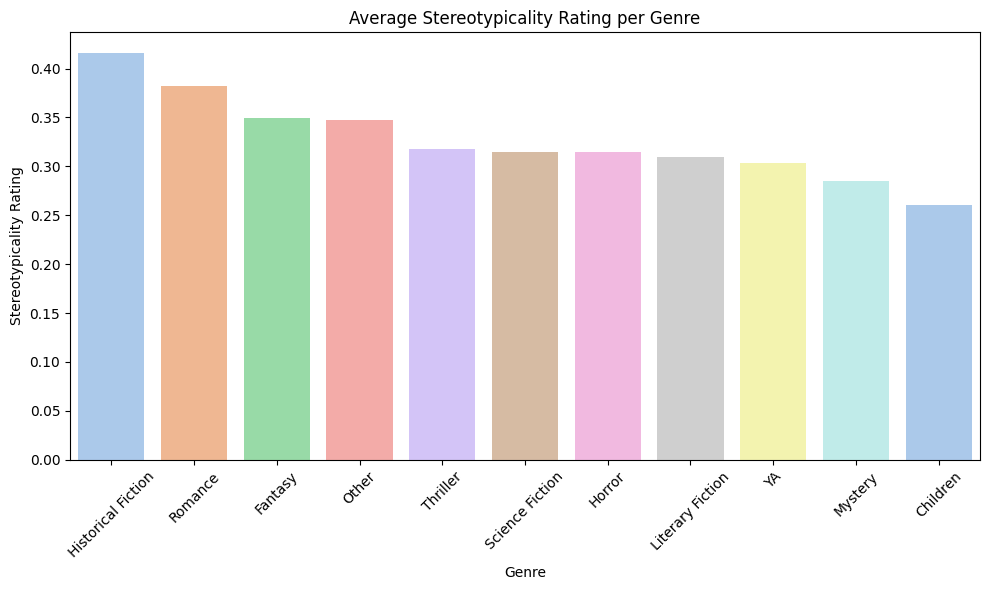

In [ ]:
# Genre only - prop_pos - plot

# Group by genre and calculate mean rating
genre_avg = df.groupby('master_genre')['prop_pos'].mean().reset_index()

# Sort if you want (optional but cute!)
genre_avg = genre_avg.sort_values(by='prop_pos', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=genre_avg, x='master_genre', y='prop_pos', palette='pastel')

plt.title("Average Stereotypicality Rating per Genre")
plt.xticks(rotation=45)
plt.ylabel("Stereotypicality Rating")
plt.xlabel("Genre")
plt.tight_layout()
plt.show()

In [ ]:
# Genre only - prop_pos_ significance test

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Drop NA values to avoid errors
df_clean = df[['master_genre', 'prop_pos']].dropna()

# Perform Tukey HSD
tukey = pairwise_tukeyhsd(endog=df_clean['prop_pos'],
                          groups=df_clean['master_genre'],
                          alpha=0.05)

print(tukey.summary())

            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1             group2       meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------
          Children            Fantasy   0.0888    0.0    0.05  0.1276   True
          Children Historical Fiction   0.1553    0.0  0.1152  0.1954   True
          Children             Horror   0.0533 0.0247  0.0034  0.1031   True
          Children   Literary Fiction   0.0485 0.0047  0.0084  0.0885   True
          Children            Mystery   0.0244 0.6873  -0.016  0.0647  False
          Children              Other   0.0868    0.0   0.046  0.1276   True
          Children            Romance   0.1213    0.0  0.0832  0.1594   True
          Children    Science Fiction   0.0541 0.0029  0.0107  0.0975   True
          Children           Thriller   0.0569 0.0006   0.015  0.0987   True
          Children                 YA    0.042 0.0423  0.0007  0.0834   True

In [ ]:
# Interaction - prop_pos - plot

# Step 1: Create the grid of combinations
predict_df_pos = pd.DataFrame(
    [(g, m) for g in df_contemp['author_gender'].unique()
            for m in df_contemp['master_genre'].unique()],
    columns=['author_gender', 'master_genre']
)

# Step 2: Match the dtypes to the training data
predict_df_pos['author_gender'] = predict_df_pos['author_gender'].astype(df_contemp['author_gender'].dtype)
predict_df_pos['master_genre'] = predict_df_pos['master_genre'].astype(df_contemp['master_genre'].dtype)

# Step 3: Make predictions
predict_df_pos['prop_pos'] = model_a_g_i_pos.predict(predict_df_pos)

In [34]:
print(predict_df_pos)

   author_gender        master_genre  prop_pos
0              1  Historical Fiction  0.415166
1              1    Literary Fiction  0.315437
2              1             Mystery  0.274595
3              1                  YA  0.308506
4              1            Children  0.245188
5              1               Other  0.374102
6              1             Romance  0.386316
7              1     Science Fiction  0.358311
8              1             Fantasy  0.365579
9              1            Thriller  0.301545
10             1              Horror  0.306389
11             0  Historical Fiction  0.401158
12             0    Literary Fiction  0.294321
13             0             Mystery  0.305723
14             0                  YA  0.283467
15             0            Children  0.200258
16             0               Other  0.293261
17             0             Romance  0.313169
18             0     Science Fiction  0.271251
19             0             Fantasy  0.322356
20           

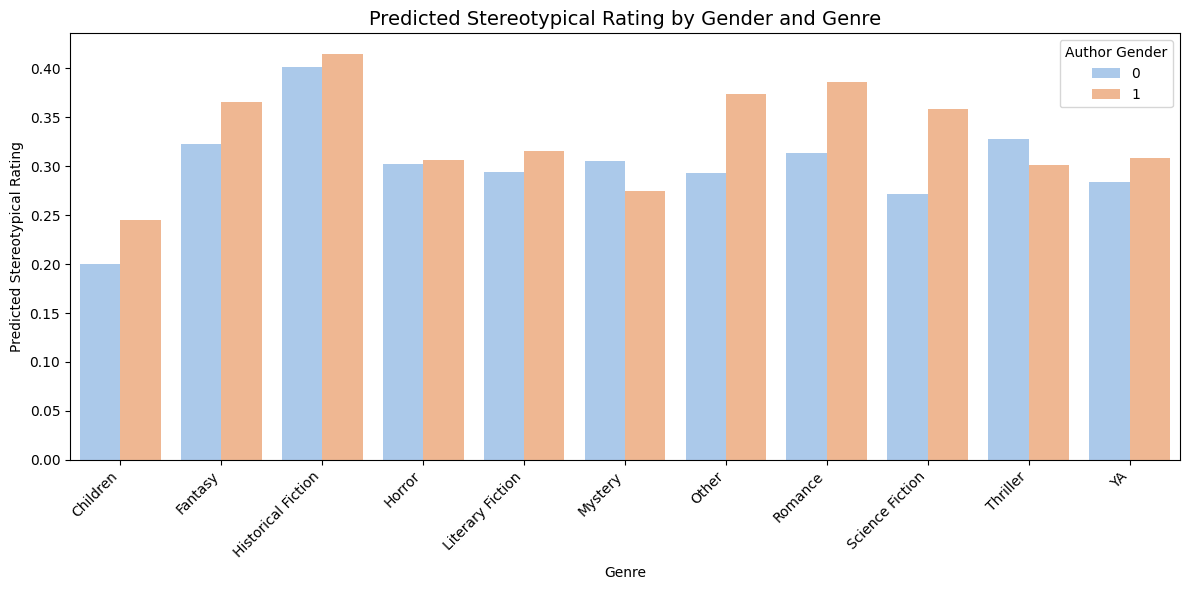

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=predict_df_pos, 
            x='master_genre', 
            y='prop_pos', 
            hue='author_gender', 
            palette='pastel')

plt.xticks(rotation=45, ha='right')
plt.title("Predicted Stereotypical Rating by Gender and Genre", fontsize=14)
plt.ylabel("Predicted Stereotypical Rating")
plt.xlabel("Genre")
plt.legend(title="Author Gender")
plt.tight_layout()
plt.show()

In [ ]:
# Interaction - prop_pos - gender per genre significance test

from scipy.stats import ttest_ind

# Create a list to store the results
results = []

for genre in df['master_genre'].unique():
    # Subset the data for this genre
    subset = df[df['master_genre'] == genre]
    
    # Get prop_pos for each gender
    men = subset[subset['author_gender'] == 0]['prop_pos'].dropna()
    women = subset[subset['author_gender'] == 1]['prop_pos'].dropna()
    
    # Perform t-test
    t_stat, p_val = ttest_ind(men, women, equal_var=False)  # Welch's t-test is safer
    
    # Store the result
    results.append({
        'genre': genre,
        'mean_men': men.mean(),
        'mean_women': women.mean(),
        't_stat': t_stat,
        'p_value': p_val,
        'n_men': len(men),
        'n_women': len(women)
    })

# Convert to DataFrame
import pandas as pd
ttest_results = pd.DataFrame(results)

In [37]:
ttest_results

,genre,mean_men,mean_women,t_stat,p_value,n_men,n_women
0,Historical Fiction,0.414114,0.417166,-0.235162,8.141488e-01,437,981
1,Literary Fiction,0.302245,0.315821,-1.388454,1.652229e-01,669,746
2,Children,0.212437,0.271362,-2.455311,1.640948e-02,54,251
3,Mystery,0.308926,0.274192,2.721007,6.679016e-03,420,892
4,YA,0.282206,0.306911,-1.640144,1.023707e-01,166,874
5,Other,0.302556,0.369198,-5.158748,3.289089e-07,379,796
6,Romance,0.328476,0.386218,-3.875152,1.372936e-04,215,2913
7,Science Fiction,0.281605,0.355738,-5.035356,6.041737e-07,395,324
8,Fantasy,0.322342,0.363105,-4.584345,4.990249e-06,712,1458
9,Thriller,0.328206,0.300582,1.876641,6.092538e-02,586,355


Genres where there is a significant difference between male and female authors: 
* In Children's literature, female authors write fmc significantly **more** stereotypically than male authors. 
* In Mystery, female authors write fmc significantly **less** stereotypically than male authors. 
* In Other, female authors write fmc significantly **more** stereotypically than male authors. 
* In Romance, female authors write fmc significantly **more** stereotypically than male authors. 
* In Science Fiction, female authors write fmc significantly **more** stereotypically than male authors. 
* In Fantasy, female authors write fmc significantly **more** stereotypically than male authors. 

## Anti-Stereotypical Items

In [48]:
# Fit the linear regression model
model_a_neg = smf.ols('prop_neg ~ author_gender', data=df_contemp).fit()

# Print the summary
print(model_a_neg.summary())

                            OLS Regression Results                            
Dep. Variable:               prop_neg   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     80.81
Date:                Mon, 26 May 2025   Prob (F-statistic):           2.83e-19
Time:                        15:55:57   Log-Likelihood:                -450.96
No. Observations:               12666   AIC:                             905.9
Df Residuals:                   12664   BIC:                             920.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept              0.5452      0

In [49]:
model_a_g_neg = smf.ols('prop_neg ~ author_gender + master_genre', data=df_contemp).fit()

# Print the summary
print(model_a_g_neg.summary())

                            OLS Regression Results                            
Dep. Variable:               prop_neg   R-squared:                       0.123
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     161.6
Date:                Mon, 26 May 2025   Prob (F-statistic):               0.00
Time:                        15:56:12   Log-Likelihood:                 341.06
No. Observations:               12666   AIC:                            -658.1
Df Residuals:                   12654   BIC:                            -568.8
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
Inte

### (author gender not significant anymore)

In [50]:
# F-test to see if genre has an overall significant effect
f_test_neg = anova_lm(model_a_neg, model_a_g_neg)
print(f_test_neg)

   df_resid         ssr  df_diff    ss_diff           F  Pr(>F)
0   12664.0  796.324745      0.0        NaN         NaN     NaN
1   12654.0  702.710494     10.0  93.614251  168.575075     0.0


In [51]:
# Fit linear regression with interaction term 
model_a_g_i_neg = smf.ols('prop_neg ~ author_gender + master_genre + author_gender * master_genre', data=df_contemp).fit()

# Print the summary
print(model_a_g_i_neg.summary())

                            OLS Regression Results                            
Dep. Variable:               prop_neg   R-squared:                       0.129
Model:                            OLS   Adj. R-squared:                  0.128
Method:                 Least Squares   F-statistic:                     89.38
Date:                Mon, 26 May 2025   Prob (F-statistic):               0.00
Time:                        15:56:39   Log-Likelihood:                 385.35
No. Observations:               12666   AIC:                            -726.7
Df Residuals:                   12644   BIC:                            -562.9
Df Model:                          21                                         
Covariance Type:            nonrobust                                         
                                                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------

In [52]:
model_me_neg = smf.ols('prop_neg ~ C(author_gender) * C(master_genre)', data=df_contemp).fit()
anova_model_me_neg = anova_lm(model_me_neg, typ=3)
print(anova_model_me_neg)

                                      sum_sq       df           F  \
Intercept                           7.922199      1.0  143.545874   
C(author_gender)                    0.066515      1.0    1.205210   
C(master_genre)                    41.471268     10.0   75.143649   
C(author_gender):C(master_genre)    4.896749     10.0    8.872639   
Residual                          697.813745  12644.0         NaN   

                                         PR(>F)  
Intercept                          6.728731e-33  
C(author_gender)                   2.723038e-01  
C(master_genre)                   2.073331e-150  
C(author_gender):C(master_genre)   1.089011e-14  
Residual                                    NaN  


/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_22244/2334444728.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=gender_avg, x='author_gender', y='prop_neg', palette='pastel')


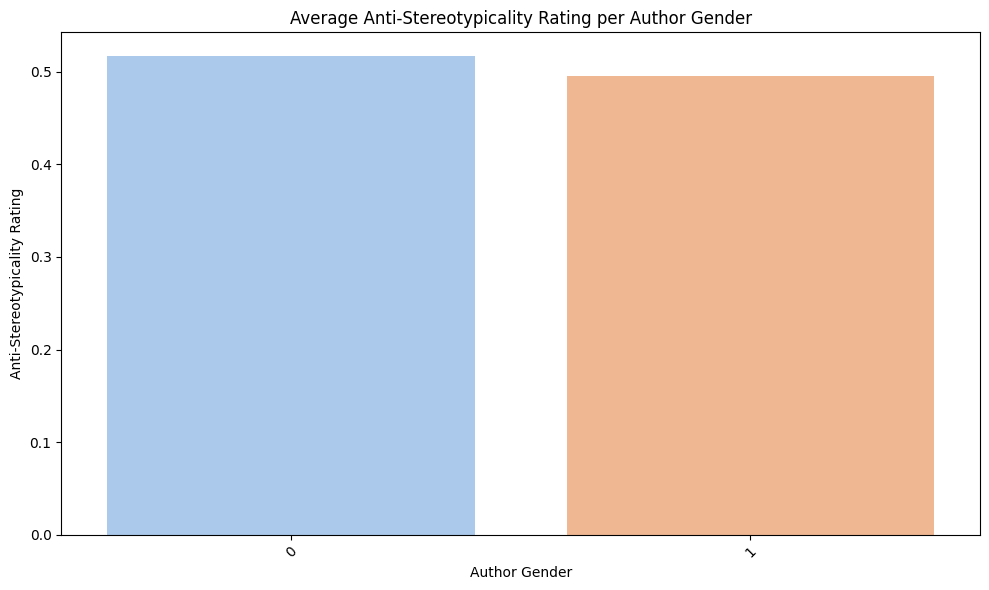

In [54]:
# Author gender - prop_neg - plot

# Group by genre and calculate mean rating
gender_avg = df.groupby('author_gender')['prop_neg'].mean().reset_index()

# Sort if you want (optional but cute!)
gender_avg = gender_avg.sort_values(by='prop_neg', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=gender_avg, x='author_gender', y='prop_neg', palette='pastel')

plt.title("Average Anti-Stereotypicality Rating per Author Gender")
plt.xticks(rotation=45)
plt.ylabel("Anti-Stereotypicality Rating")
plt.xlabel("Author Gender")
plt.tight_layout()
plt.show()

/var/folders/bx/rdryvfkd49jg3gxyh8cb60s40000gn/T/ipykernel_22244/842024465.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=genre_avg, x='master_genre', y='prop_neg', palette='pastel')


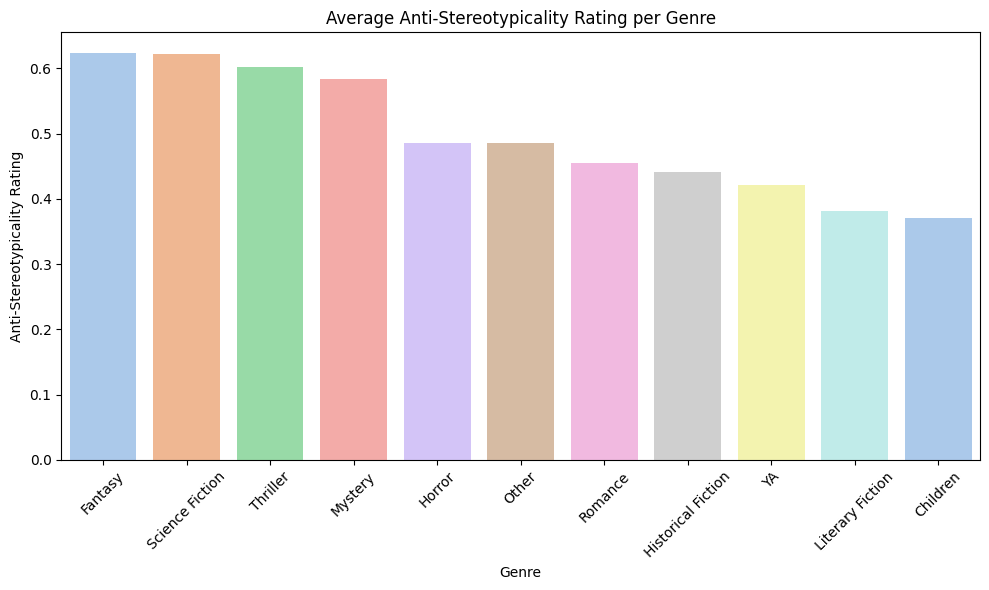

In [55]:
# Genre - prop_neg - plot

# Group by genre and calculate mean rating
genre_avg = df.groupby('master_genre')['prop_neg'].mean().reset_index()

# Sort if you want (optional but cute!)
genre_avg = genre_avg.sort_values(by='prop_neg', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=genre_avg, x='master_genre', y='prop_neg', palette='pastel')

plt.title("Average Anti-Stereotypicality Rating per Genre")
plt.xticks(rotation=45)
plt.ylabel("Anti-Stereotypicality Rating")
plt.xlabel("Genre")
plt.tight_layout()
plt.show()

In [57]:
# Genre - prop_neg - significance test

from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Drop NA values to avoid errors
df_clean = df[['master_genre', 'prop_neg']].dropna()

# Perform Tukey HSD
tukey = pairwise_tukeyhsd(endog=df_clean['prop_neg'],
                          groups=df_clean['master_genre'],
                          alpha=0.05)

print(tukey.summary())

            Multiple Comparison of Means - Tukey HSD, FWER=0.05             
      group1             group2       meandiff p-adj   lower   upper  reject
----------------------------------------------------------------------------
          Children            Fantasy   0.2536    0.0  0.2072  0.2999   True
          Children Historical Fiction   0.0711 0.0001  0.0232   0.119   True
          Children             Horror   0.1149    0.0  0.0553  0.1746   True
          Children   Literary Fiction   0.0108 0.9997 -0.0371  0.0586  False
          Children            Mystery    0.214    0.0  0.1658  0.2622   True
          Children              Other   0.1147    0.0   0.066  0.1635   True
          Children            Romance   0.0837    0.0  0.0383  0.1292   True
          Children    Science Fiction   0.2511    0.0  0.1992   0.303   True
          Children           Thriller   0.2309    0.0  0.1809  0.2809   True
          Children                 YA   0.0514 0.0327  0.0021  0.1008   True

In [61]:
# Interaction - prop_neg - gender per genre plot

# Step 1: Create the grid of combinations
predict_df_neg = pd.DataFrame(
    [(g, m) for g in df_contemp['author_gender'].unique()
            for m in df_contemp['master_genre'].unique()],
    columns=['author_gender', 'master_genre']
)

# Step 2: Match the dtypes to the training data
predict_df_neg['author_gender'] = predict_df_neg['author_gender'].astype(df_contemp['author_gender'].dtype)
predict_df_neg['master_genre'] = predict_df_neg['master_genre'].astype(df_contemp['master_genre'].dtype)

# Step 3: Make predictions
predict_df_neg['prop_neg'] = model_a_g_i_neg.predict(predict_df_neg)

In [64]:
print(predict_df_neg)

   author_gender        master_genre  prop_neg
0              1  Historical Fiction  0.451853
1              1    Literary Fiction  0.389562
2              1             Mystery  0.612898
3              1                  YA  0.424248
4              1            Children  0.380361
5              1               Other  0.487067
6              1             Romance  0.462721
7              1     Science Fiction  0.598359
8              1             Fantasy  0.621710
9              1            Thriller  0.561423
10             1              Horror  0.497899
11             0  Historical Fiction  0.466223
12             0    Literary Fiction  0.381537
13             0             Mystery  0.566144
14             0                  YA  0.415036
15             0            Children  0.424323
16             0               Other  0.498924
17             0             Romance  0.363641
18             0     Science Fiction  0.688898
19             0             Fantasy  0.651417
20           

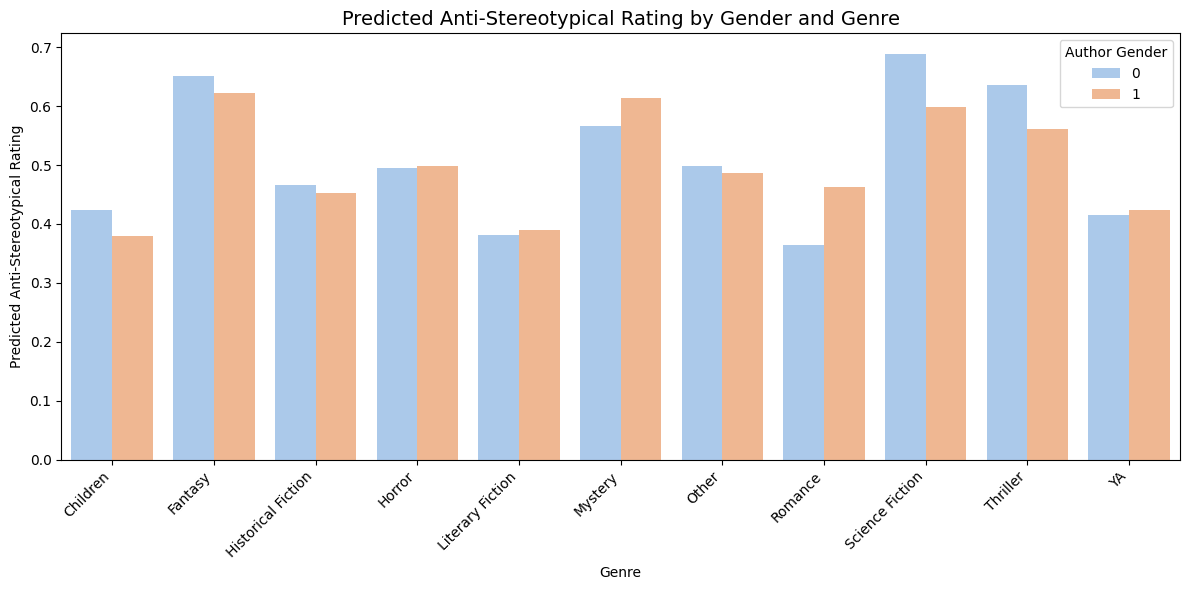

In [62]:
plt.figure(figsize=(12, 6))
sns.barplot(data=predict_df_neg, 
            x='master_genre', 
            y='prop_neg', 
            hue='author_gender', 
            palette='pastel')

plt.xticks(rotation=45, ha='right')
plt.title("Predicted Anti-Stereotypical Rating by Gender and Genre", fontsize=14)
plt.ylabel("Predicted Anti-Stereotypical Rating")
plt.xlabel("Genre")
plt.legend(title="Author Gender")
plt.tight_layout()
plt.show()

In [58]:
# Interaction - prop_neg - gender per genre significance test

from scipy.stats import ttest_ind

# Create a list to store the results
results = []

for genre in df['master_genre'].unique():
    # Subset the data for this genre
    subset = df[df['master_genre'] == genre]
    
    # Get prop_pos for each gender
    men = subset[subset['author_gender'] == 0]['prop_neg'].dropna()
    women = subset[subset['author_gender'] == 1]['prop_neg'].dropna()
    
    # Perform t-test
    t_stat, p_val = ttest_ind(men, women, equal_var=False)  # Welch's t-test is safer
    
    # Store the result
    results.append({
        'genre': genre,
        'mean_men': men.mean(),
        'mean_women': women.mean(),
        't_stat': t_stat,
        'p_value': p_val,
        'n_men': len(men),
        'n_women': len(women)
    })

# Convert to DataFrame
ttest_results = pd.DataFrame(results)

In [60]:
ttest_results

,genre,mean_men,mean_women,t_stat,p_value,n_men,n_women
0,Historical Fiction,0.429890,0.446903,-1.101647,2.710030e-01,433,980
1,Literary Fiction,0.372023,0.389710,-1.567974,1.171238e-01,667,743
2,Children,0.412190,0.361628,1.684803,9.647979e-02,54,251
3,Mystery,0.545110,0.603136,-3.526961,4.482552e-04,418,887
4,YA,0.415722,0.423221,-0.383035,7.020847e-01,166,874
5,Other,0.484866,0.485507,-0.038591,9.692283e-01,377,789
6,Romance,0.361493,0.461156,-6.281218,1.528923e-09,213,2896
7,Science Fiction,0.643693,0.595296,2.644603,8.359729e-03,387,324
8,Fantasy,0.637915,0.617463,1.918503,5.527002e-02,709,1457
9,Thriller,0.626218,0.560594,3.459422,5.712247e-04,584,353


## Other Analyses

In [67]:
# Correlation between pos and neg score

# Calculate correlation
correlation = df_contemp['prop_pos'].corr(df['prop_neg'])

print(f"Correlation between prop_pos and prop_neg: {correlation:.3f}")


Correlation between prop_pos and prop_neg: -0.333


In [71]:
# Select your binary item columns
items = df_contemp[['Q4.answer', 'Q5.answer', 'Q6.answer', 'Q7.answer', 'Q8.answer', 'Q9.answer',
        'Q10.answer', 'Q11.answer', 'Q12.answer', 'Q13.answer', 'Q14.answer', 'Q15.answer',
        'Q16.answer', 'Q17.answer', 'Q18.answer', 'Q19.answer', 'Q20.answer', 'Q21.answer',
        'Q22.answer', 'Q23.answer', 'Q24.answer', 'Q25.answer', 'Q26.answer', 'Q27.answer',
        'Q28.answer', 'Q29.answer']]


# Compute the correlation matrix (ignores NA automatically)
cor_matrix = items.corr()

# Optional: Round and print nicely
print(cor_matrix.round(2))


            Q4.answer  Q5.answer  Q6.answer  Q7.answer  Q8.answer  Q9.answer  \
Q4.answer        1.00       0.02       0.53      -0.02       0.33      -0.23   
Q5.answer        0.02       1.00       0.13       0.73       0.03       0.21   
Q6.answer        0.53       0.13       1.00       0.13       0.45      -0.10   
Q7.answer       -0.02       0.73       0.13       1.00      -0.02       0.24   
Q8.answer        0.33       0.03       0.45      -0.02       1.00      -0.02   
Q9.answer       -0.23       0.21      -0.10       0.24      -0.02       1.00   
Q10.answer       0.28       0.02       0.20       0.01      -0.02      -0.07   
Q11.answer       0.00       0.17      -0.04       0.19      -0.18       0.08   
Q12.answer       0.11       0.01       0.16       0.02       0.06      -0.08   
Q13.answer      -0.07       0.26      -0.01       0.34      -0.09       0.32   
Q14.answer       0.10      -0.09       0.04      -0.10      -0.01      -0.26   
Q15.answer       0.08       0.31       0

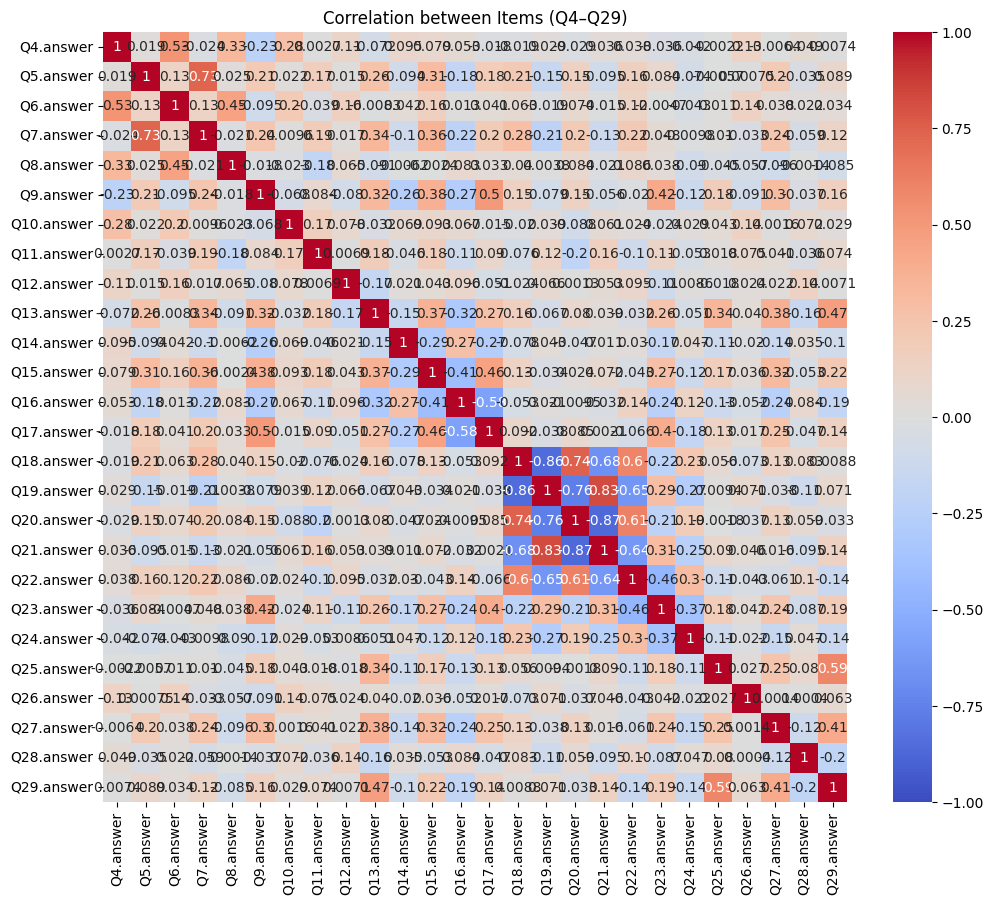

In [72]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))
sns.heatmap(cor_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation between Items (Q4–Q29)")
plt.show()